# Optimizer : Gradient descent 
### for finding the optimized w and b values efficiently

In [1]:
import pandas as pd

output_path = './Salary_Data.csv'

path = output_path
df = pd.read_csv(output_path)

# y = w*x + b
x = df["YearsExperience"]
y = df["Salary"]
df.head(5)

,YearsExperience,Salary
0,0.3,36.2
1,0.6,36.6
2,0.8,42.8
3,1.1,39.3
4,1.3,46.2


## Gradient of cost
### y = ax + b
### cost = (y_real - y_predic) = (y_real - wx - b)**2
### w_gradient = Dcost/Dw = -2x(y - wx - b)
### b_gradient = Dcost/Db-2(y - wx - b)

In [2]:
def compute_gradient(x, y, w, b):
  w_gradient = (x*(w*x+b -y)).mean()
  b_gradient = (w*x+b -y).mean()
  return w_gradient, b_gradient

In [3]:
compute_gradient(x, y, 20, 10)

(268.54757575757577, 35.084848484848486)

In [4]:
def compute_cost(x, y, w, b):
  y_pred = w*x + b
  cost = (y - y_pred)**2
  cost = cost.sum() / len(x)
# or 
# cost = ((y - y_pred)**2).mean()

  return cost

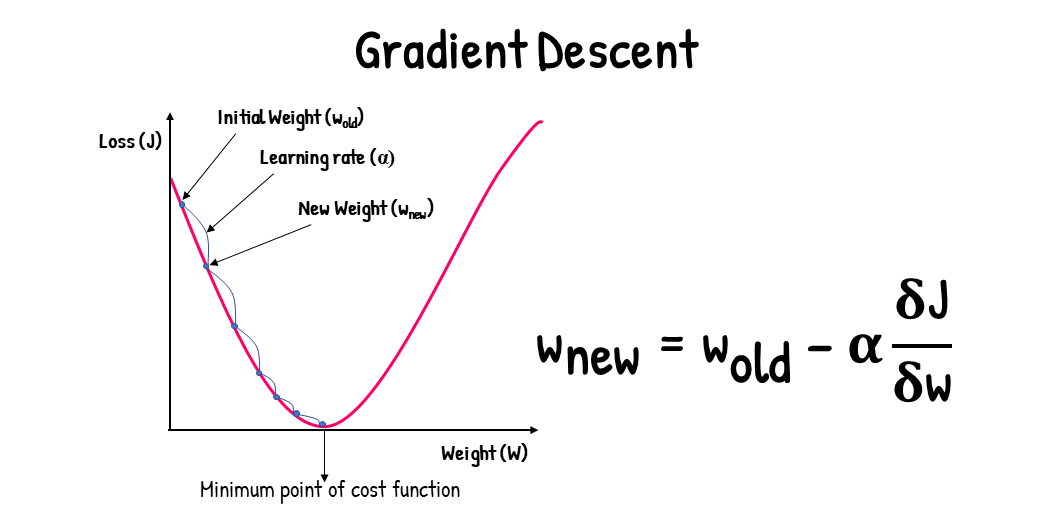

In [5]:
def gradient_descent(x, y, w_init, b_init, learning_rate, cost_function, gradient_function, run_iter, p_iter=1000):

  c_hist = []
  w_hist = []
  b_hist = []

  w = w_init
  b = b_init

  for i in range(run_iter):
    w_gradient, b_gradient = gradient_function(x, y, w, b)

    w = w - w_gradient*learning_rate
    b = b - b_gradient*learning_rate
    cost = cost_function(x, y, w, b)

    w_hist.append(w)
    b_hist.append(b)
    c_hist.append(cost)

    if i%p_iter == 0:
      print(f"Iteration {i:5} : Cost {cost: .4e}, w: {w: .2e}, b: {b: .2e}, w_gradient: {w_gradient: .2e}, b_gradient: {b_gradient: .2e}")

  return w, b, w_hist, b_hist, c_hist

In [13]:
w_init = 0
b_init = 0
learning_rate = 1.0e-4
run_iter = 200000

w_final, b_final, w_hist, b_hist, c_hist = gradient_descent(x, y, w_init, b_init, learning_rate, compute_cost, compute_gradient, run_iter)

Iteration     0 : Cost  6.0016e+03, w:  4.36e-02, b:  7.26e-03, w_gradient: -4.36e+02, b_gradient: -7.26e+01
Iteration  1000 : Cost  2.1505e+02, w:  1.25e+01, b:  2.58e+00, w_gradient: -1.42e+01, b_gradient: -9.06e+00
Iteration  2000 : Cost  1.9890e+02, w:  1.28e+01, b:  3.31e+00, w_gradient:  4.59e-01, b_gradient: -6.67e+00
Iteration  3000 : Cost  1.9024e+02, w:  1.27e+01, b:  3.96e+00, w_gradient:  9.45e-01, b_gradient: -6.42e+00
Iteration  4000 : Cost  1.8203e+02, w:  1.26e+01, b:  4.60e+00, w_gradient:  9.38e-01, b_gradient: -6.25e+00
Iteration  5000 : Cost  1.7426e+02, w:  1.25e+01, b:  5.21e+00, w_gradient:  9.14e-01, b_gradient: -6.08e+00
Iteration  6000 : Cost  1.6688e+02, w:  1.25e+01, b:  5.81e+00, w_gradient:  8.90e-01, b_gradient: -5.92e+00
Iteration  7000 : Cost  1.5989e+02, w:  1.24e+01, b:  6.40e+00, w_gradient:  8.66e-01, b_gradient: -5.77e+00
Iteration  8000 : Cost  1.5327e+02, w:  1.23e+01, b:  6.97e+00, w_gradient:  8.43e-01, b_gradient: -5.62e+00
Iteration  9000 : C

Iteration 76000 : Cost  3.5615e+01, w:  9.64e+00, b:  2.46e+01, w_gradient:  1.37e-01, b_gradient: -9.15e-01
Iteration 77000 : Cost  3.5448e+01, w:  9.62e+00, b:  2.47e+01, w_gradient:  1.34e-01, b_gradient: -8.91e-01
Iteration 78000 : Cost  3.5290e+01, w:  9.61e+00, b:  2.48e+01, w_gradient:  1.30e-01, b_gradient: -8.67e-01
Iteration 79000 : Cost  3.5141e+01, w:  9.60e+00, b:  2.48e+01, w_gradient:  1.27e-01, b_gradient: -8.44e-01
Iteration 80000 : Cost  3.4999e+01, w:  9.59e+00, b:  2.49e+01, w_gradient:  1.23e-01, b_gradient: -8.22e-01
Iteration 81000 : Cost  3.4864e+01, w:  9.57e+00, b:  2.50e+01, w_gradient:  1.20e-01, b_gradient: -8.00e-01
Iteration 82000 : Cost  3.4737e+01, w:  9.56e+00, b:  2.51e+01, w_gradient:  1.17e-01, b_gradient: -7.79e-01
Iteration 83000 : Cost  3.4616e+01, w:  9.55e+00, b:  2.52e+01, w_gradient:  1.14e-01, b_gradient: -7.59e-01
Iteration 84000 : Cost  3.4501e+01, w:  9.54e+00, b:  2.52e+01, w_gradient:  1.11e-01, b_gradient: -7.39e-01
Iteration 85000 : C

Iteration 151000 : Cost  3.2468e+01, w:  9.19e+00, b:  2.75e+01, w_gradient:  1.86e-02, b_gradient: -1.24e-01
Iteration 152000 : Cost  3.2465e+01, w:  9.19e+00, b:  2.76e+01, w_gradient:  1.81e-02, b_gradient: -1.20e-01
Iteration 153000 : Cost  3.2462e+01, w:  9.19e+00, b:  2.76e+01, w_gradient:  1.76e-02, b_gradient: -1.17e-01
Iteration 154000 : Cost  3.2460e+01, w:  9.19e+00, b:  2.76e+01, w_gradient:  1.71e-02, b_gradient: -1.14e-01
Iteration 155000 : Cost  3.2457e+01, w:  9.19e+00, b:  2.76e+01, w_gradient:  1.67e-02, b_gradient: -1.11e-01
Iteration 156000 : Cost  3.2455e+01, w:  9.18e+00, b:  2.76e+01, w_gradient:  1.62e-02, b_gradient: -1.08e-01
Iteration 157000 : Cost  3.2452e+01, w:  9.18e+00, b:  2.76e+01, w_gradient:  1.58e-02, b_gradient: -1.05e-01
Iteration 158000 : Cost  3.2450e+01, w:  9.18e+00, b:  2.76e+01, w_gradient:  1.54e-02, b_gradient: -1.03e-01
Iteration 159000 : Cost  3.2448e+01, w:  9.18e+00, b:  2.76e+01, w_gradient:  1.50e-02, b_gradient: -9.98e-02
Iteration 

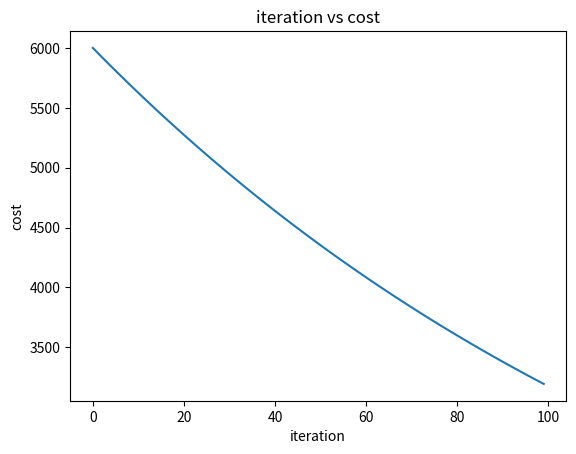

In [14]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(0, 100), c_hist[:100])
plt.title("iteration vs cost")
plt.xlabel("iteration")
plt.ylabel("cost")
plt.show()


In [15]:
print(f"最終w b=({w_final:.2f}, {b_final:.2f})")

最終w b=(9.14, 27.89)


In [16]:
print(f"年資3.5  預測薪水:{w_final*3.5 + b_final:.1f}K")
print(f"年資5.9  預測薪水:{w_final*5.9 + b_final:.1f}K")

年資3.5  預測薪水:59.9K
年資5.9  預測薪水:81.8K


In [17]:
# w=-100~100 b=-100~100 的 cost
import numpy as np

ws = np.arange(-100, 101)
bs = np.arange(-100, 101)
costs = np.zeros((201, 201))

i = 0
for w in ws:
  j = 0
  for b in bs:
    cost = compute_cost(x, y, w, b)
    costs[i,j] = cost
    j = j+1
  i = i+1

costs

array([[543097.74787879, 541777.28121212, 540458.81454545, ...,
        320651.34787879, 319726.88121212, 318804.41454545],
       [534727.50939394, 533416.80636364, 532108.10333333, ...,
        314214.30939394, 313299.60636364, 312386.90333333],
       [526422.82181818, 525121.88242424, 523822.9430303 , ...,
        307842.82181818, 306937.88242424, 306034.9430303 ],
       ...,
       [164229.90787879, 164842.64121212, 165457.37454545, ...,
        324557.10787879, 325565.84121212, 326576.57454545],
       [168838.74939394, 169461.24636364, 170085.74333333, ...,
        331099.14939394, 332117.64636364, 333138.14333333],
       [173513.14181818, 174145.40242424, 174779.6630303 , ...,
        337706.74181818, 338735.00242424, 339765.2630303 ]])

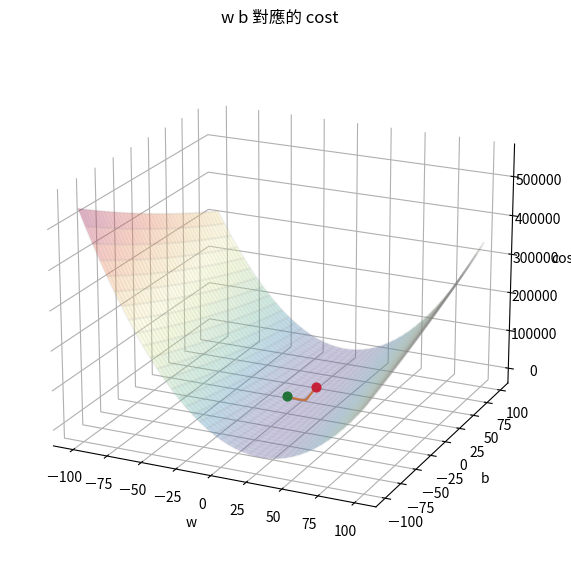

In [18]:
import matplotlib as mpl
from matplotlib.font_manager import fontManager

fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")

plt.figure(figsize=(7, 7))
ax = plt.axes(projection="3d")
ax.view_init(20, -65)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0))

b_grid, w_grid = np.meshgrid(bs, ws)
# https://wangyeming.github.io/2018/11/12/numpy-meshgrid/

# ax.plot_surface(w_grid, b_grid, costs,  alpha=0.3)
ax.plot_surface(w_grid, b_grid, costs, cmap="Spectral_r", alpha=0.3)
ax.plot_wireframe(w_grid, b_grid, costs, color="grey", alpha=0.1)

ax.set_title("w b 對應的 cost")
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("cost")

w_index, b_index = np.where(costs == np.min(costs))
ax.scatter(w_hist[-1], b_hist[-1], c_hist[-1], color="red", s=40)
ax.scatter(w_hist[0], b_hist[0], c_hist[0], color="green", s=40)
ax.plot(w_hist, b_hist, c_hist)

plt.show()